# Chapter 5 - Algorithms for supervised learning 
The following exercises test your familiarity with the content of chapter 5. Specifically, after completing the exercises, you will be able to
- ...
- ...
- ...

## Exercise 1: 
We established in the lecture, that the linear regression model is not suitable for classification problems. Let's test this claim empirically.

### 1.1 Synthetic data
Create a synthetic data set for binary classification using the sklearn function `make_classification()`. We want to plot the data later. So use only two input variables.

In [83]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=500)

print("Shape of X {}".format(X.shape))  
print("Shape of y {}".format(y.shape))

Shape of X (500, 2)
Shape of y (500,)


### 1.2 Linear regression
We discussed the analytical solution to the least-squares loss minimization problem in the lecture. To recall, using our standard notation, we can compute the regression parameters $\beta$ by 
$$ \beta^* = \left( X^{\top} X \right)^{-1}  X^{\top}  y $$

Calculate $\beta^*$ using plain numpy. Recall you need to augment $X$ with a column of ones to ensure that your regression model includes an intercept.  

In [88]:
import numpy as np
constant = np.ones((500, 1))
np.array(constant)
X_new = np.append( constant, X,  axis=1)
print("Shape of X {}".format(X.shape))  
print(X_new)


#X_sqr = np.matmul(X.transpose() , X)
beta_half = np.matmul(np.linalg.inv(np.matmul(X_new.transpose() , X_new)) , X_new.transpose() , )
beta_star = np.matmul (beta_half, y)
print(beta_star)

Shape of X (500, 2)
[[ 1.          0.50192877 -1.38472011]
 [ 1.         -1.30948851 -1.9754428 ]
 [ 1.          1.14403466  0.14761281]
 ...
 [ 1.          0.08657133 -1.73812044]
 [ 1.         -1.06139378 -2.96265182]
 [ 1.         -0.86775423 -0.89634605]]
[ 0.44626424  0.3657284  -0.0578259 ]


### 1.3 Plotting
Create a chart that depicts your data set. Use different colors for the data points of the two classes. Also plot the decision surface that corresponds to your regression model from task 1.2.

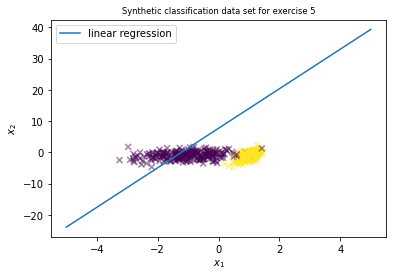

In [133]:
import matplotlib.pyplot as plt
plt.title("Synthetic classification data set for exercise 5", fontsize='small')

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=.5, marker='x');

x_1 = np.linspace(-5, 5)  # we plot the hyperplane for this range of values

x_2 = - beta_star[1] / beta_star[2] * x_1 - beta_star[0] / beta_star[2]  # evaluate our above equation

plt.plot(x_1,x_2, label='linear regression');
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");
plt.legend(loc='best');


### 1.4 Residuals
Compute and plot the residuals of your linear regression model. Inspecting the graph, how do you judge the adequacy of the linear regression model for the data at hand.

Text(0.5, 1.0, 'Residual Analysis')

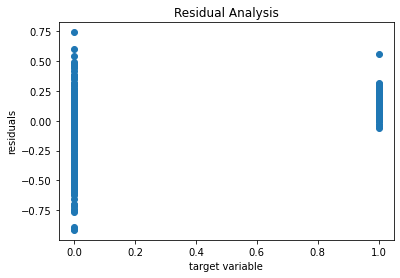

In [115]:
y_hat = np.matmul (X_new, beta_star)
e = y - y_hat 
plt.scatter(y,e)
plt.xlabel("target variable")
plt.ylabel("residuals")
plt.title("Residual Analysis")


### 1.5 Logistic regression
Now estimate a logistic regression model for your synthetic data set using standard sklearn functionality. Reproduce the plot from task 1.3 and incorporate the class boundary from the logistic model in the plot. It should also include the result from the linear regression. By visual inspection, does the logit model give a better fit? Briefly state your opinion. 

In [116]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

logit_model = sm.Logit(y, X_new.astype(float), ) 
logit_model = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.078602
         Iterations 11


In [117]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.8866
Time:                        08:05:24   Log-Likelihood:                -39.301
converged:                       True   LL-Null:                       -346.57
Covariance Type:            nonrobust   LLR p-value:                3.589e-134
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7171      1.004     -4.697      0.000      -6.685      -2.749
x1             7.6736      1.087      7.061      0.000       5.544       9.804
x2            -1.1128      0.325     -3.421      0.001      -1.750      -0.475
==============================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ValueError: x and y must be the same size

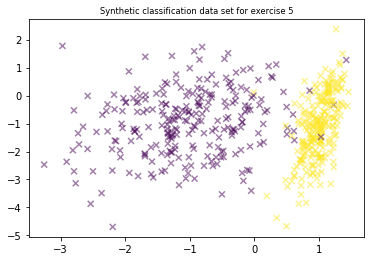

In [138]:
plt.title("Synthetic classification data set for exercise 5", fontsize='small')

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=.5, marker='x');

x_1 = np.linspace(-5, 5)  # we plot the hyperplane for this range of values

x_2 = - beta_star[1] / beta_star[2] * x_1 - beta_star[0] / beta_star[2]  # evaluate our above equation

plt.figure(1, figsize=(4, 3))

plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

In [142]:
import seaborn as sns
sns.regplot(X='balance', y='default',   logistic=True)

TypeError: regplot() got an unexpected keyword argument 'X'